In [2]:
from pathlib import Path
import json
import pandas as pd
import nltk
import re
import io
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
lemmatizer = WordNetLemmatizer()

path = Path('Nanosafety_2020.csv')

scopus = pd.read_csv(path)


for row in scopus:
    big_string_title = ''.join(str(scopus['Title']))
    big_string_content = ''.join(str(scopus['Content']))
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")
wordlist = re.sub("[^\w]", " ", 'ha').split()
sw_addons = {'of', 'and', 'for', 'in', 'a', 'the', 'one', 'by', 'inf inf', 'with', 'an', 'using', 'via', 'based', 'nan', 'date', 'used', 'b', 'tio', 'nanote'}
sw_addons.update(wordlist)
re_clean_title = regex.sub('', big_string_title)
re_clean_content = regex.sub('', big_string_content)
words_title = word_tokenize(re_clean_title)
words_content = word_tokenize(re_clean_content)
lem_title = [lemmatizer.lemmatize(word) for word in words_title]
lem_content = [lemmatizer.lemmatize(word) for word in words_content]
output_title = [word.lower() for word in lem_title if word.lower() not in sw.union(sw_addons)]
output_content = [word.lower() for word in lem_content if word.lower() not in sw.union(sw_addons)]
full_string_title = ' '.join(output_title)
full_string_content = ' '.join(output_content)

In [66]:
text_title = scopus.Title.tolist()
text_title = ' '.join(text_title).lower()
sw = set(stopwords.words('english'))
sw_addons = {'inf', 'nano', 'based', 'effect', 'impact', ''}
wordcloud = WordCloud(stopwords = sw.union(sw_addons),
                      collocations=True).generate(text_title)

text_dictionary = wordcloud.process_text(text_title)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
word_freq

{'nanoparticle': 82,
 'cell': 70,
 'nanomaterial': 68,
 'cancer': 33,
 'peptide': 33,
 'tumor': 30,
 'enhanced': 29,
 'toxicity': 29,
 'risk': 26,
 'application': 25,
 'assessment': 23,
 'human': 22,
 'metal': 22,
 'effects': 22,
 'nanosafety': 22,
 'vitro': 21,
 'nanotechnology': 20,
 'induced': 20,
 'imaging': 20,
 'detection': 20,
 'safety': 20,
 'treatment': 20,
 'vivo': 20,
 'therapy': 19,
 'therapeutic': 18,
 'study': 18,
 'interaction': 18,
 'carbon nanotube': 18,
 'lung': 17,
 'approach': 17,
 'exposure': 17,
 'material': 17,
 'model': 16,
 'surface': 16,
 'mechanism': 16,
 'nanomedicine': 16,
 'review': 16,
 'edcs': 16,
 'particle': 16,
 'via': 15,
 'delivery': 15,
 'using': 15,
 'drug': 14,
 'dna': 14,
 'graphene oxide': 14,
 'gold nanoparticle': 14,
 'new': 13,
 'potential': 13,
 'analysis': 13,
 'method': 13,
 'metal organic': 13,
 'organic framework': 13,
 'graphene': 12,
 'health': 12,
 'polymer': 12,
 'single': 12,
 'environmental': 12,
 'oxide nanoparticle': 12,
 'persp

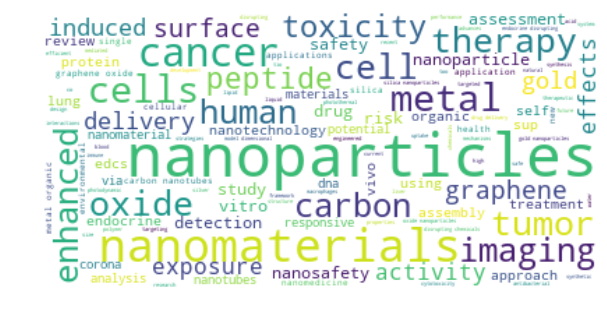

In [68]:
corpus = [' '.join(scopus.Title.tolist()) for row in scopus]

cv=CountVectorizer(ngram_range=(1, 3), stop_words = sw.union(sw_addons), analyzer = 'word')
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
text=bow.loc[0].sort_values(ascending=False)[:4000]
text_top20 = text[:50]
text2_dict=bow.loc[0].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='white')
wordcloud.generate_from_frequencies(text2_dict)



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

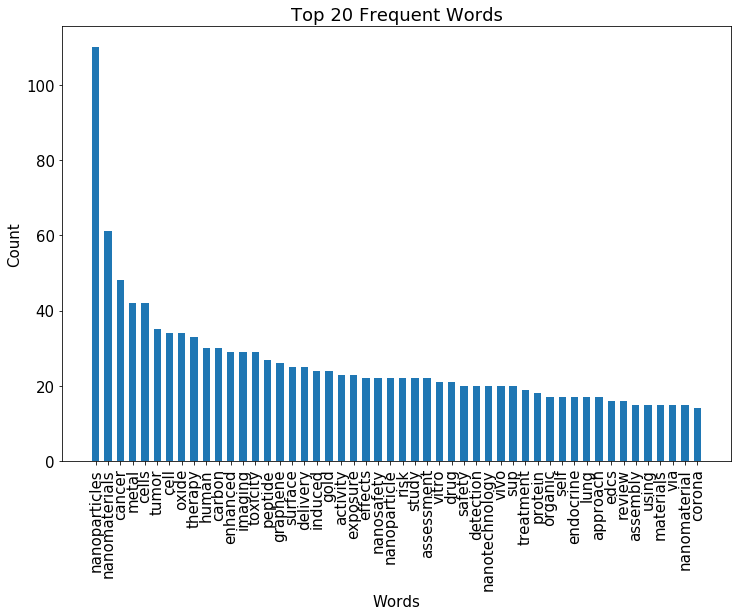

In [70]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15) 
bar = plt.bar(*zip(*text_top20.items()), width = .6, orientation = 'vertical')
plt.xticks(rotation = 90)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 Frequent Words")
plt.show()

In [75]:
rel_freq=wordcloud.words_
print(list(word_freq.items())[:10])
print(list(rel_freq.items())[:10])

[('nanoparticle', 82), ('cell', 70), ('nanomaterial', 68), ('cancer', 33), ('peptide', 33), ('tumor', 30), ('enhanced', 29), ('toxicity', 29), ('risk', 26), ('application', 25)]
[('nanoparticles', 1.0), ('nanomaterials', 0.5545454545454546), ('cancer', 0.43636363636363634), ('metal', 0.38181818181818183), ('cells', 0.38181818181818183), ('tumor', 0.3181818181818182), ('cell', 0.3090909090909091), ('oxide', 0.3090909090909091), ('therapy', 0.3), ('human', 0.2727272727272727)]
